In [112]:
%matplotlib inline

In [113]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

In [114]:

df = pd.read_csv("Languages.csv", usecols=['Language', 'Total Speakers', 'Native Speakers', 'Origin'])   
df.head()     

,Language,Total Speakers,Native Speakers,Origin
0,English,1132366680,379007140.0,Indo-European
1,Mandarin Chinese,1116596640,917868640.0,Sino-Tibetan
2,Hindi,615475540,341208640.0,Indo-European
3,Spanish,534335730,460093030.0,Indo-European
4,French,279821930,77177210.0,Indo-European


In [115]:
for index, row in languages_by_origin.iterrows():
    print(f"Origin: {row['Origin']}")
    print(f"Languages: {', '.join(row['Language'])}\n")

Origin: Afro-Asiatic
Languages: Standard Arabic, Egyptian Spoken Arabic, Hausa, Moroccan Spoken Arabic, Algerian Spoken Arabic, Sundanese Spoken Arabic, Amharic, North Levantine Spoken Arabic, Sa'idi Spoken Arabic, Somali, Mesopotamian Spoken Arabic, Hijazi Spoken Arabic, South Levantine Spoken Arabic, Tunisian Spoken Arabic, Sanaani Spoken Arabic

Origin: Austronesian
Languages: Indonesian, Vietnamese, Javanese, Filipino, Sunda, Tagalog, Malay, Khmer, Cebuano

Origin: Dravidian
Languages: Telugu, Tamil, Kannada, Malayalam 

Origin: Indo-European
Languages: English, Hindi, Spanish, French, Bengali, Russian, Portuguese, Urdu, Standard German, Marathi, Western Punjabi, Italian, Gujarati, Iranian Persian, Bhojpuri, Polish, Odia, Maithili, Ukrainian, Eastern Punjabi, Nigerian Pidgin, Sindhi, Nepali, Romanian, Dutch, Northern Pashto, Magahi, Saraiki, Afrikaans, Sinhala, Chhattisgarhi, Assamese, Northern Kurdish, Bavarian, Czech, Greek, Chittagonian, Swedish, Deccan, Sadri, Cameroonian Pidgi

In [116]:
binary_matrix = pd.get_dummies(df['Origin']).groupby(df['Language']).max()
binary_matrix.reset_index(inplace=True)
binary_matrix

,Language,Afro-Asiatic,Austronesian,Dravidian,Indo-European,Japanic,Koreanic,Kra-Dai,Niger-Congo,Sino-Tibetan,Turkic,Uralic
0,Afrikaans,False,False,False,True,False,False,False,False,False,False,False
1,Algerian Spoken Arabic,True,False,False,False,False,False,False,False,False,False,False
2,Amharic,True,False,False,False,False,False,False,False,False,False,False
3,Assamese,False,False,False,True,False,False,False,False,False,False,False
4,Bamanankan,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Xhosa,False,False,False,False,False,False,False,True,False,False,False
96,Xiang Chinese,False,False,False,False,False,False,False,False,True,False,False
97,Yoruba,False,False,False,False,False,False,False,True,False,False,False
98,Yue Chinese,False,False,False,False,False,False,False,False,True,False,False


In [117]:
numeric_columns = binary_matrix.columns[1:] 
numeric_matrix = binary_matrix[numeric_columns]

distance_vector = distance.cdist(numeric_matrix.iloc[[0]], numeric_matrix, metric='euclidean')[0]

print("Euclidean Distances:")
print(distance_vector)

Euclidean Distances:
[0.         1.41421356 1.41421356 0.         1.41421356 0.
 0.         0.         1.41421356 0.         1.41421356 0.
 0.         0.         0.         0.         0.         1.41421356
 0.         1.41421356 0.         1.41421356 0.         0.
 1.41421356 1.41421356 1.41421356 0.         1.41421356 1.41421356
 1.41421356 0.         0.         1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 0.         0.         1.41421356 1.41421356 1.41421356 0.
 1.41421356 1.41421356 0.         1.41421356 0.         1.41421356
 1.41421356 0.         0.         1.41421356 1.41421356 0.
 0.         0.         0.         0.         1.41421356 0.
 1.41421356 0.         1.41421356 0.         0.         1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 0.         1.41421356
 0.         1.41421356 1.41421356 1.41421356 0.         0.
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 0.         0.         1.41421

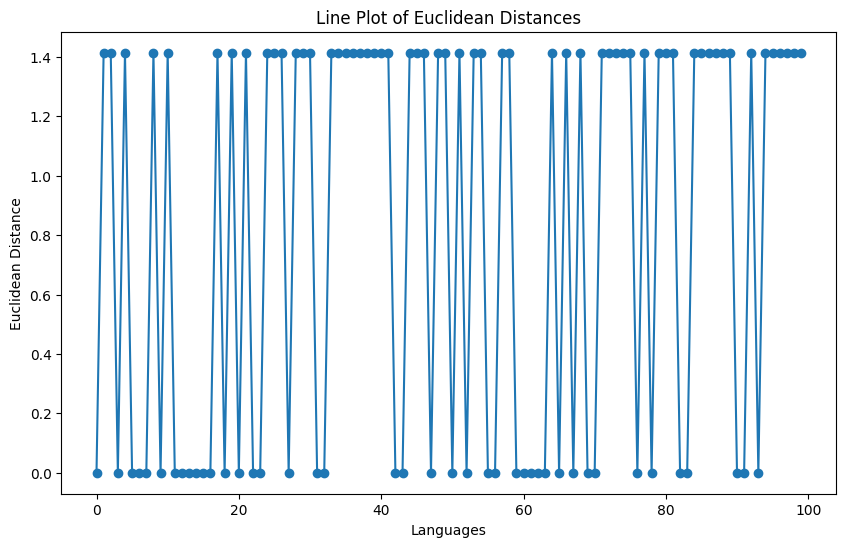

In [118]:
x_values = range(len(distance_vector))

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, distance_vector, marker='o', linestyle='-')

# Labeling
plt.title('Line Plot of Euclidean Distances')
plt.xlabel('Languages')
plt.ylabel('Euclidean Distance')

plt.show()